In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [66]:
directory = "/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Binary Classification/Signal_HIDDEN_in_strain_data/ALIGO_noise/Test 6/data/"

In [67]:
data_BBH_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/better_results/Processed_BBH_Merged_original.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)

noise_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/better_results/Noise.csv", header=None)
noise = noise_df.values.astype(float)

print(len(data_BBH_df.index))

X = np.concatenate((data_BBH, noise), axis=0)

y = [1 for i in range(48)] + [0 for i in range(24)]

X *= 1e19
print(X)

# X *= 1e18
# print(X)

# X *= 1e20
# print(X)

# X /= 3
# print(X)

X = np.expand_dims(X, axis=-1)
print(X.shape)
print(y)
print(len(y))

48
[[ -0.49854737  -0.44398916  -0.39978193 ...  -6.52569751  -6.47762335
   -6.40958272]
 [ -0.28612673  -0.16123224  -0.22758115 ...   0.16484453   0.16148672
    0.11877726]
 [ -0.45770554  -0.4019826   -0.37596076 ...  -3.01223743  -2.9156767
   -2.82206414]
 ...
 [ -1.95546708   7.44894473 -13.16565383 ... -10.23853211  -0.45718099
   -8.30393007]
 [ 18.75970637  -4.12351768 -13.54554715 ...  -7.44579682   0.73848328
   -3.76604019]
 [ -1.37618357   7.81200447   6.22594025 ...  -4.89525391   0.74339223
  -12.57868259]]
(72, 16384, 1)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
72


In [68]:
# model = load_model("/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Binary Classification/Signal_HIDDEN_in_strain_data/White_noise/Test 6 alternate hard/data/model_trial_1.h5")

In [69]:
model = load_model(directory + "model_trial_1.h5")

In [70]:
pred = model.predict(X)
# print(pred)

# print(np.argmax(pred, axis = 1))

In [71]:
y_pred = np.argmax(pred, axis = 1)
correct = 0

for i in range(len(X)):
  if y_pred[i]==y[i]:
    correct += 1

acc = (correct/len(X))*100
print(f"Total no. of data samples: {len(X)}")
print(f"No. of correct predictions: {correct}")
print(f"accuracy: {acc}")

Total no. of data samples: 72
No. of correct predictions: 72
accuracy: 100.0


Precision: 1.000
Recall: 1.000
F1-Score: 1.000


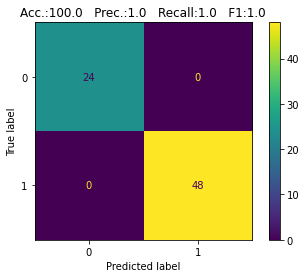

In [72]:
precision = precision_score(y, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(acc, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/real_cm_1.png")
plt.show()

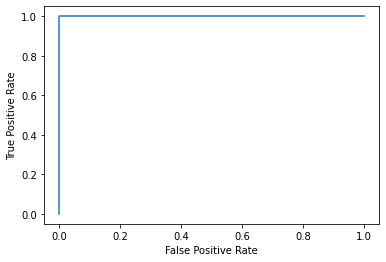

In [73]:
pred = model.predict(X)
pos_probs = pred[:,1]
fpr, tpr, _ = roc_curve(y, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/real_roc_1.png")
plt.show()

In [74]:
bbh_events= ['GW190519_153544',
             'GW170823',
             'GW190814',
             'GW190728_064510',
             'GW151226',
             'GW190421_213856',
             'GW190727_060333',
             'GW190513_205428',
             'GW190521_074359',
             'GW190408_181802',
             'GW170729',
             'GW190915_235702',
             'GW190929_012149',
             'GW190910_112807',
             'GW170104',
             'GW190909_114149',
             'GW190424_180648',
             'GW190512_180714',
             'GW190412',
             'GW190517_055101',
             'GW190620_030421',
             'GW190706_222641',
             'GW170814',
             'GW190708_232457',
             'GW151012',
             'GW190930_133541',
             'GW190731_140936',
             'GW190828_065509',
             'GW190701_203306',
             'GW150914',
             'GW190720_000836',
             'GW190719_215514',
             'GW190924_021846',
             'GW170608',
             'GW190503_185404',
             'GW190514_065416',
             'GW190527_092055',
             'GW190413_134308',
             'GW190425',
             'GW190602_175927',
             'GW190521',
             'GW170809',
             'GW170818',
             'GW190413_052954',
             'GW190828_063405',
             'GW190707_093326',
             'GW190630_185205',
             'GW190803_022701']

In [75]:
classes = ["Noise", "BBH"]

for i in range(len(X)):
  prob = list(pred[i])
  fig = plt.figure(figsize =(4.5,4.5))

  plt.bar(classes, prob, color ='maroon',
          width = 0.4)
  
  plt.ylabel("Probability")

  if i < 48:
    plt.title(bbh_events[i])
  else:
    plt.title("Noise")

  plt.savefig(directory + "bar plots/" + str(i) + ".png")
  plt.close()
  # plt.show()